In [63]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from tsfresh.feature_extraction.feature_calculators import absolute_maximum

In [6]:
file_name = "train.h5"
f1 = h5py.File(file_name, 'r+')

In [138]:
custom_fc_parameters = {
    
        'absolute_maximum': None,
        'mean': None,
    
}

temp_y = []
for i in range(len(f1['y'])):
    temp_y.append(f1['y'][i])
Y = np.array(temp_y)
size = 10000
increment = 1000
index = 0
numpy_matrix = np.zeros(shape = (len(f1['x']), int(size/increment)))
for j in np.arange(0,size,increment):
    temp_x = []
    for i in range(len(f1['x'])):
        temp_x.append(f1['x'][i][0][j:j+increment])
    df = pd.DataFrame()
    for i, ts in enumerate(temp_x):
        data = [[x, i] for x in ts]
        df = df.append(data, ignore_index=True)
    df.columns = ['value', 'id']
    tf = extract_features(df, column_id='id', column_value='value', default_fc_parameters=custom_fc_parameters)
    numpy_matrix[:, index] =  tf['value__absolute_maximum'].to_numpy() - tf['value__mean'].to_numpy()
    index += 1
print(numpy_matrix)
X = numpy_matrix


C:\Users\user\AppData\Local\Temp\ipykernel_21088\1059001686.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 17.09it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_21088\1059001686.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 17.37it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_21088\1059001686.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 17.70it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_21088\1059001686.py:23: Fut

[[0.18396597 0.16901737 0.17762224 ... 0.17527128 0.17456887 0.11308932]
 [0.20811284 0.25153166 0.20221065 ... 0.13550793 0.26044311 0.21791813]
 [0.13368138 0.150037   0.1652877  ... 0.1549365  0.14364445 0.17893867]
 ...
 [0.21882217 0.10632033 0.27373958 ... 0.16315199 0.11865681 0.14691088]
 [0.0146612  0.03660839 0.01065903 ... 0.01360113 0.0352481  0.01500799]
 [0.25542554 0.54254776 0.3029047  ... 0.49286489 0.45697575 0.42587005]]


In [130]:
print(Y)

[0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [139]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
machine = sklearn.svm.SVC()
machine.fit(X_train, Y_train)

SVC()

142 10
142
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0]
[1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0]


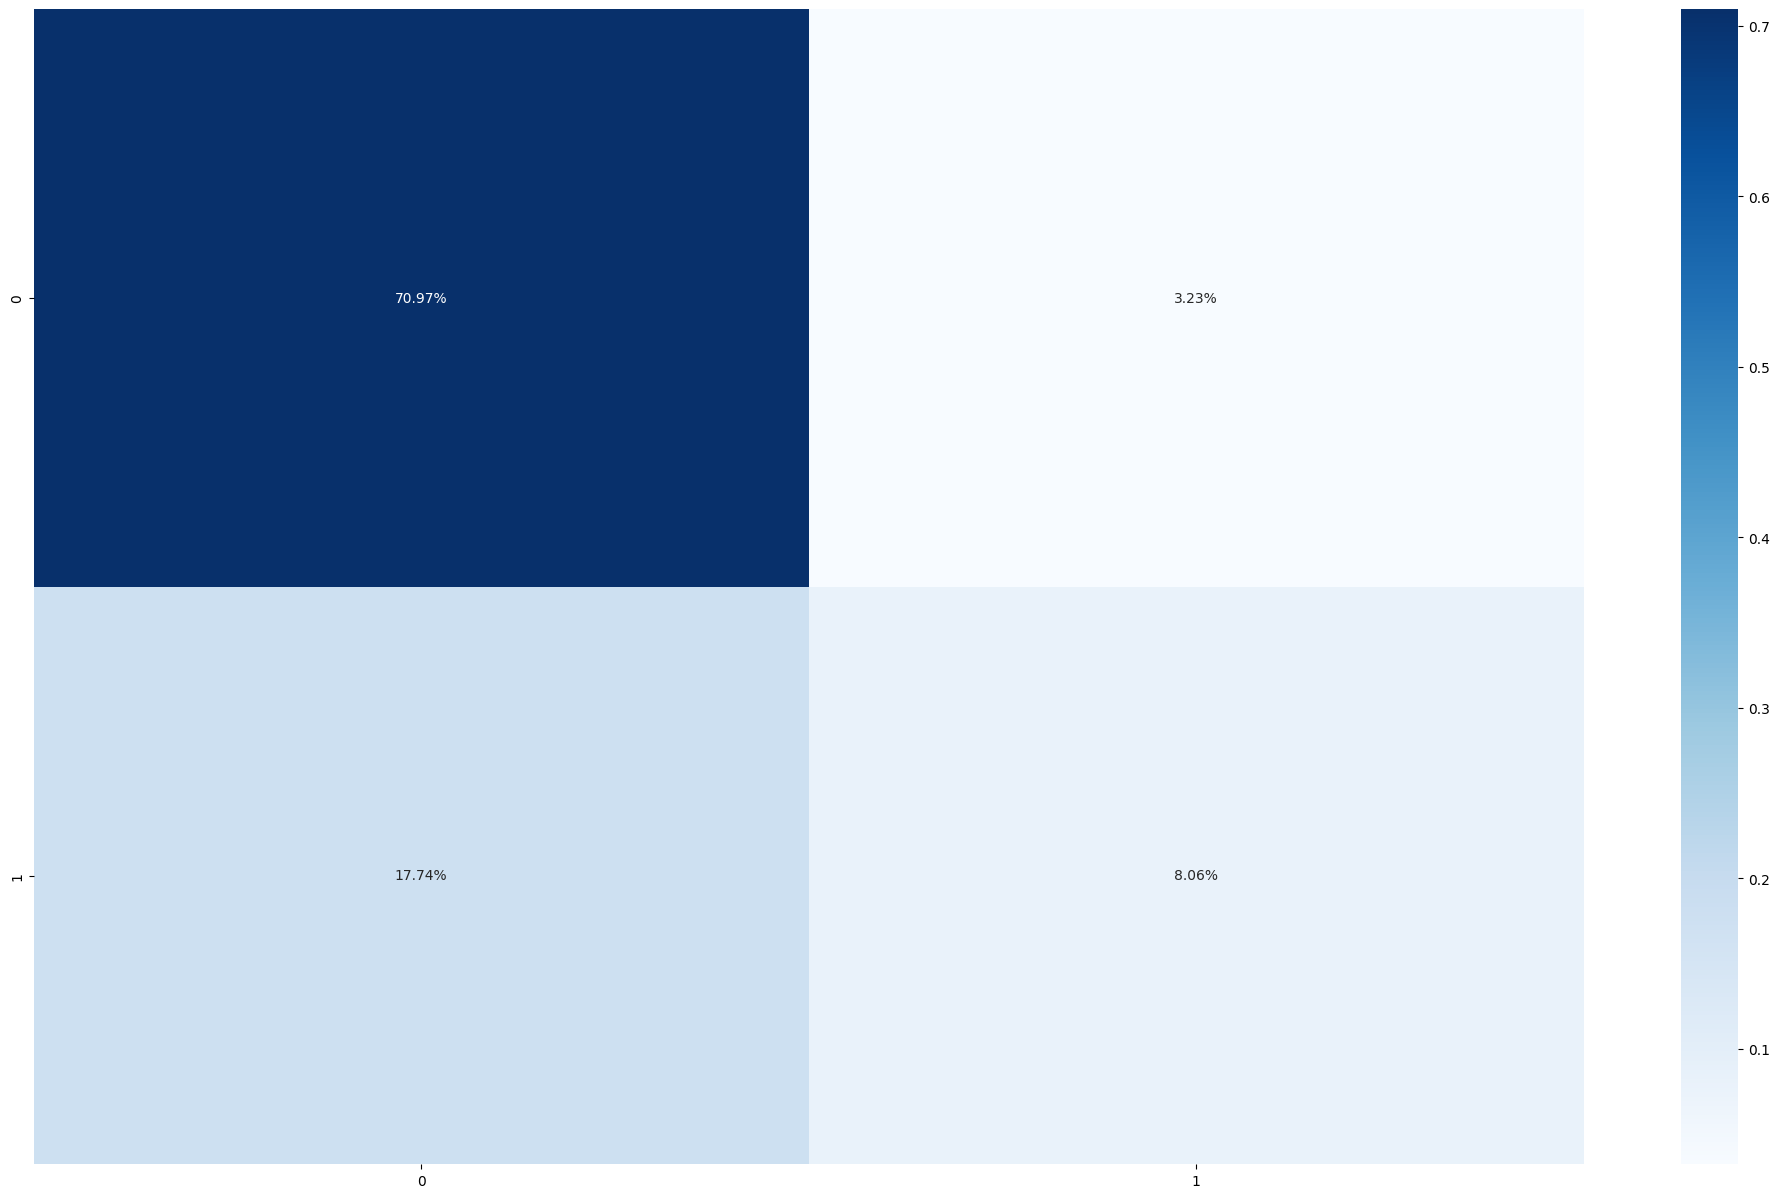

In [140]:
print(len(X_train), len(X_train[0]))
print(len(Y_train))
y_pred = machine.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(25, 15))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

print(y_pred)
print(Y_test)